In [122]:
import numpy as np
import matplotlib.pyplot as plt

# Generating X and calculating y

In [123]:
sigma=0.2
X=np.array(np.random.normal(10,5,100))
X=np.sort(X)
func=np.cos((X*np.pi/3.5))
y=np.array(func+np.random.normal(0,sigma,100))

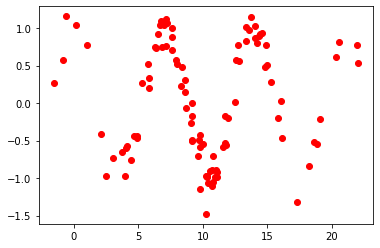

In [124]:
plt.plot(X,y,'ro')

# convert data to matrix

In [125]:
X_mat=np.matrix(X).T
m=X_mat.shape[0]

In [126]:
X_con=np.concatenate([np.ones([m,1]),X_mat],1)

In [127]:
def lwr(X,y,tau):
    y_pred=np.zeros(m)
    for i in range(m):
        y_pred[i]=X[i]*localweight(X[i],X,y,tau)
    return y_pred

def localweight(xi,X, y, tau):
    wt=funct(xi, X, tau)
    w=np.linalg.inv(X.T*(wt*X))*((X.T*wt)*y.T)
    return w

def funct(xi, X, tau):
    weights=np.mat(np.eye(m))
    for i in range(m):
        diff=xi-X[i]
        weights[i,i]=np.exp(diff*diff.T/(-2.0*tau**2))
    return weights

In [128]:
y_mat=np.matrix(y)
tau=0.5
y_predicted=lwr(X_con, y_mat, tau)


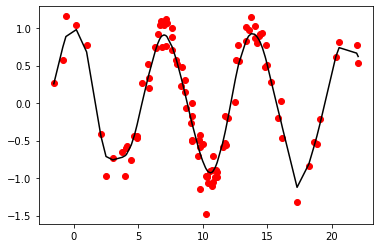

In [129]:
plt.plot(X,y,'ro')
plt.plot(X,y_predicted,'k-')